# Problema 4

Considere el siguiente problema de valor inicial

$$
\frac{dy}{dx}
=\frac{x-3y-3\!\left(x^{2}-y^{2}\right)+3xy}{\,2x-y+3\!\left(x^{2}-y^{2}\right)+2xy\,},
\qquad y(1.5)=0. \tag{3}
$$


## Inciso a

Graficar el campo de direcciones de la EDO anterior.  

In [2]:
import sys
print(sys.executable)


C:\Users\Cindy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

In [4]:
# Definimos la función del campo de direcciones
def F(x, y):
    dx = x - 3*y - 3*(x**2 - y**2) + 3*x*y
    dy = 2*x - y + 3*(x**2 - y**2) + 2*x*y
    return dx, dy



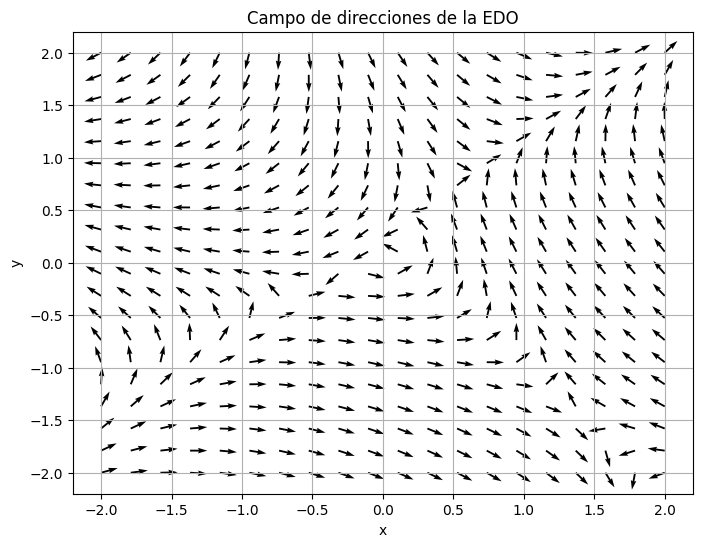

In [5]:
# Rango de la gráfica
x_vals = np.linspace(-2, 2, 20)  
y_vals = np.linspace(-2, 2, 20)

X, Y = np.meshgrid(x_vals, y_vals)
U, V = F(X, Y)

# Normalización para que las flechas tengan tamaño uniforme
M = np.hypot(U, V)
M[M == 0] = 1  # evitar división entre cero
U /= M
V /= M

# Graficamos el campo
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, angles="xy")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Campo de direcciones de la EDO")
plt.grid(True)
plt.show()

Este resultado nos dice cómo se comporta la EDO localmente en cada punto del plano. No tenemos todavía la curva exacta, pero sí una “guía visual” de hacia dónde apuntan las soluciones dependiendo de la región del plano.

## Inciso b

A partir del campo de direcciones, esbozar la solución del problema de valor inicial (3), y agregar la curva solución al *plot* del campo de direcciones.  

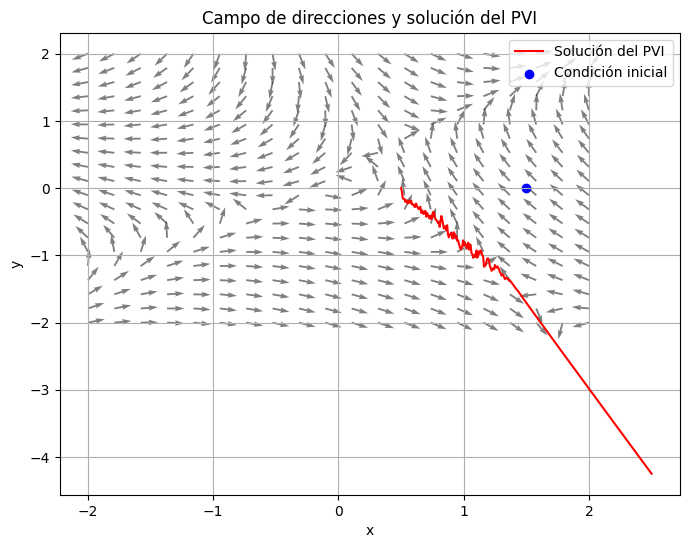

In [6]:
# Definimos la EDO como pendiente dy/dx
def f(x, y):
    dx, dy = F(x, y[0])   # solve_ivp manda y como array
    return dy / dx if dx != 0 else 0

# Condición inicial
x0, y0 = 1.5, 0

# Intervalo de integración y puntos a evaluar
x_span = (0.5, 2.5)  
x_eval = np.linspace(x_span[0], x_span[1], 300)

# Resolver la EDO con solve_ivp
sol = solve_ivp(f, x_span, [y0], t_eval=x_eval, method="RK45")

# --- Graficar campo de direcciones (reusando lo del inciso a) ---
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, angles="xy", alpha=0.5)  # X,Y,U,V ya están de (a)

# --- Graficar solución ---
plt.plot(sol.t, sol.y[0], "r", label="Solución del PVI")
plt.scatter([x0], [y0], color="blue", marker="o", label="Condición inicial")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Campo de direcciones y solución del PVI")
plt.legend()
plt.grid(True)
plt.show()


La solución numérica obtenida (curva roja) muestra que el problema de valor inicial dado en 
(1.5,0) sigue el patrón del campo de direcciones y se dirige rápidamente hacia valores negativos de 𝑦. Esto refleja la naturaleza inestable del sistema, en donde la trayectoria no converge a un equilibrio, sino que se aleja a medida que avanza 𝑥.

## Inciso c

Hallar numéricamente los puntos de equilibrio de la EDO anterior, que son aquellos puntos en donde el campo de direcciones $F(x,y)=\mathbf{0}$ es el vector nulo. Para ello, resolver numéricamente el sistema:

$$
\begin{cases}
x-3y-3\!\left(x^{2}-y^{2}\right)+3xy=0,\\[2pt]
2x-y+3\!\left(x^{2}-y^{2}\right)+2xy=0.
\end{cases}
$$